<a href="https://colab.research.google.com/github/ultimatecrack/machine-learning/blob/master/word-cloud/word-cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

In [0]:
c1 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/CommentsJan2017.csv')
c2 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/CommentsFeb2017.csv')
c3 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/CommentsMarch2017.csv')
c4 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/CommentsApril2017.csv')
c5 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/CommentsMay2017.csv')
c6 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/CommentsJan2018.csv')
c7 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/CommentsFeb2018.csv')
c8 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/CommentsMarch2018.csv')
c9 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/CommentsApril2018.csv')

In [0]:
comments = pd.concat([c1, c2, c3, c4, c5, c6, c7, c8, c9])
comments.duplicated(subset=None, keep='first')
comments.drop_duplicates(subset='commentID',inplace=True)

In [0]:
a1 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/ArticlesJan2017.csv')
a2 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/ArticlesFeb2017.csv')
a3 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/ArticlesMarch2017.csv')
a4 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/ArticlesApril2017.csv')
a5 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/ArticlesMay2017.csv')
a6 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/ArticlesJan2018.csv')
a7 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/ArticlesFeb2018.csv')
a8 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/ArticlesMarch2018.csv')
a9 = pd.read_csv('/content/drive/My Drive/ml files/wordcloud/ArticlesApril2018.csv')
articles = pd.concat([a1, a2, a3, a4, a5, a6, a7, a8, a9])
articles.drop_duplicates(subset='articleID', inplace=True)

In [13]:
comments.shape

(2118617, 34)

In [14]:
articles.shape

(9298, 16)

In [0]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
d = '/content/drive/My Drive/ml files/wordcloud/masks/'

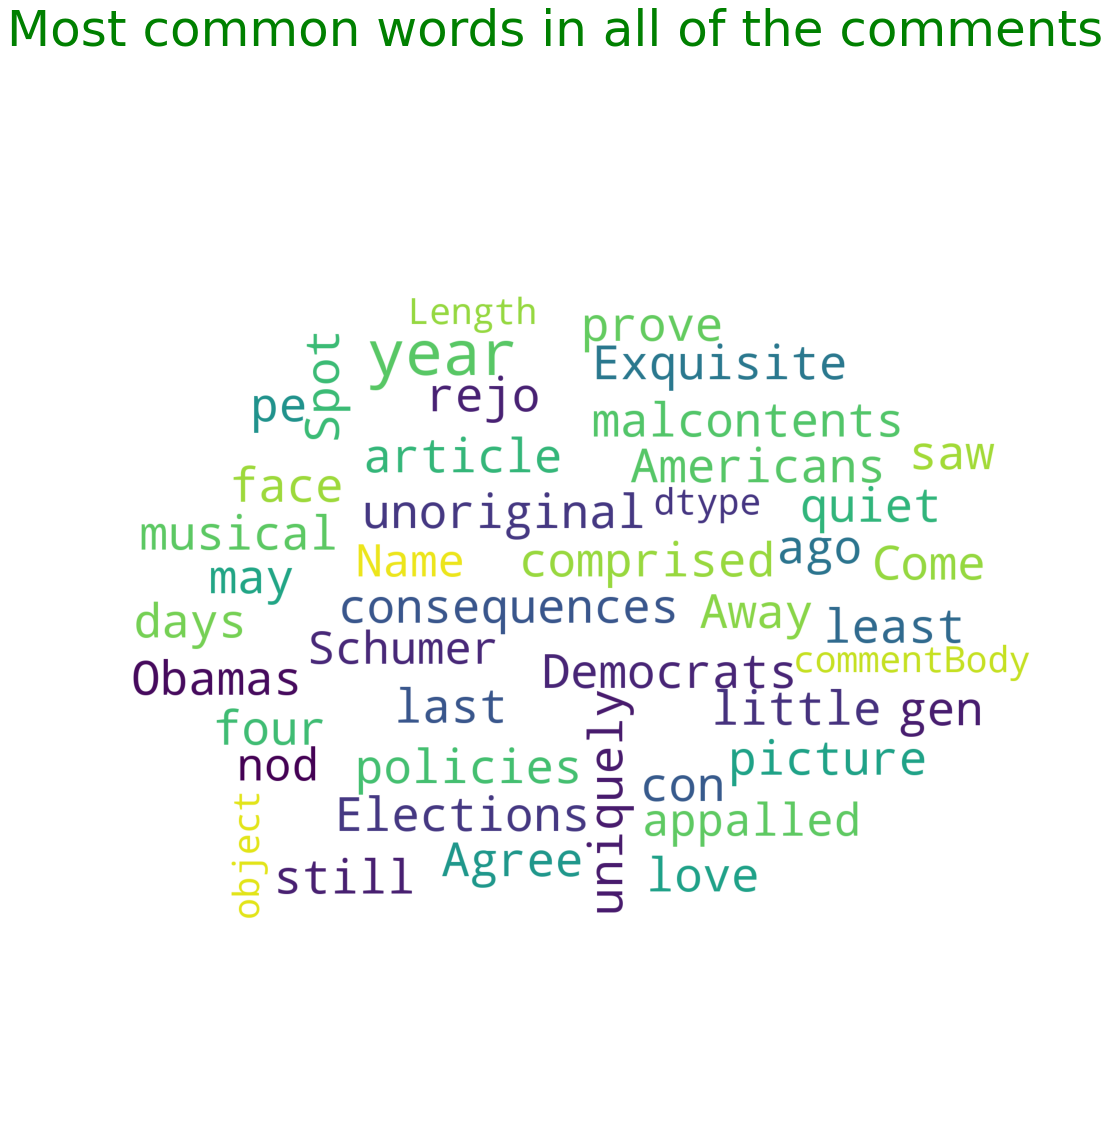

In [16]:
comments_text = str(comments.commentBody)
comments_mask = np.array(Image.open(d + 'comment.png'))
plot_wordcloud(comments_text, comments_mask, max_words=400, max_font_size=120, 
               title = 'Most common words in all of the comments', title_size=50)

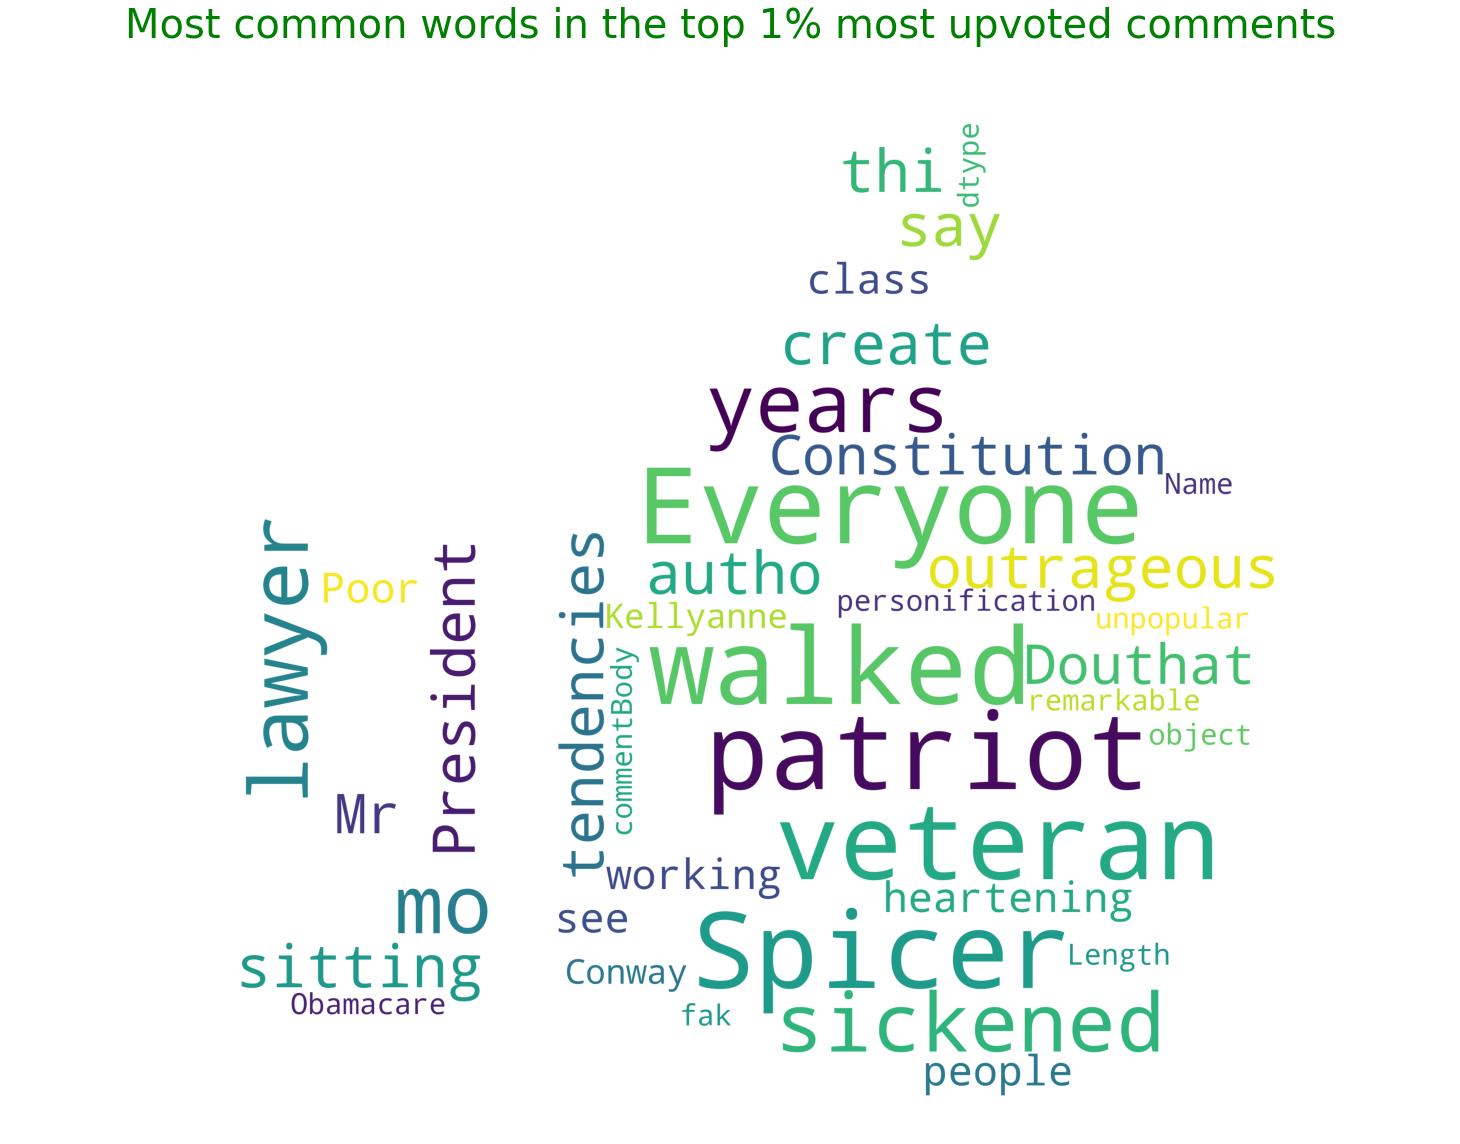

In [17]:
n = round(comments.shape[0]*0.01)
top_recommended_comments_text = str(comments.nlargest(n, columns='recommendations').commentBody)
upvote_mask = np.array(Image.open(d + 'upvote.png'))
plot_wordcloud(top_recommended_comments_text, upvote_mask, max_words=300000, max_font_size=300,
               title = 'Most common words in the top 1% most upvoted comments')

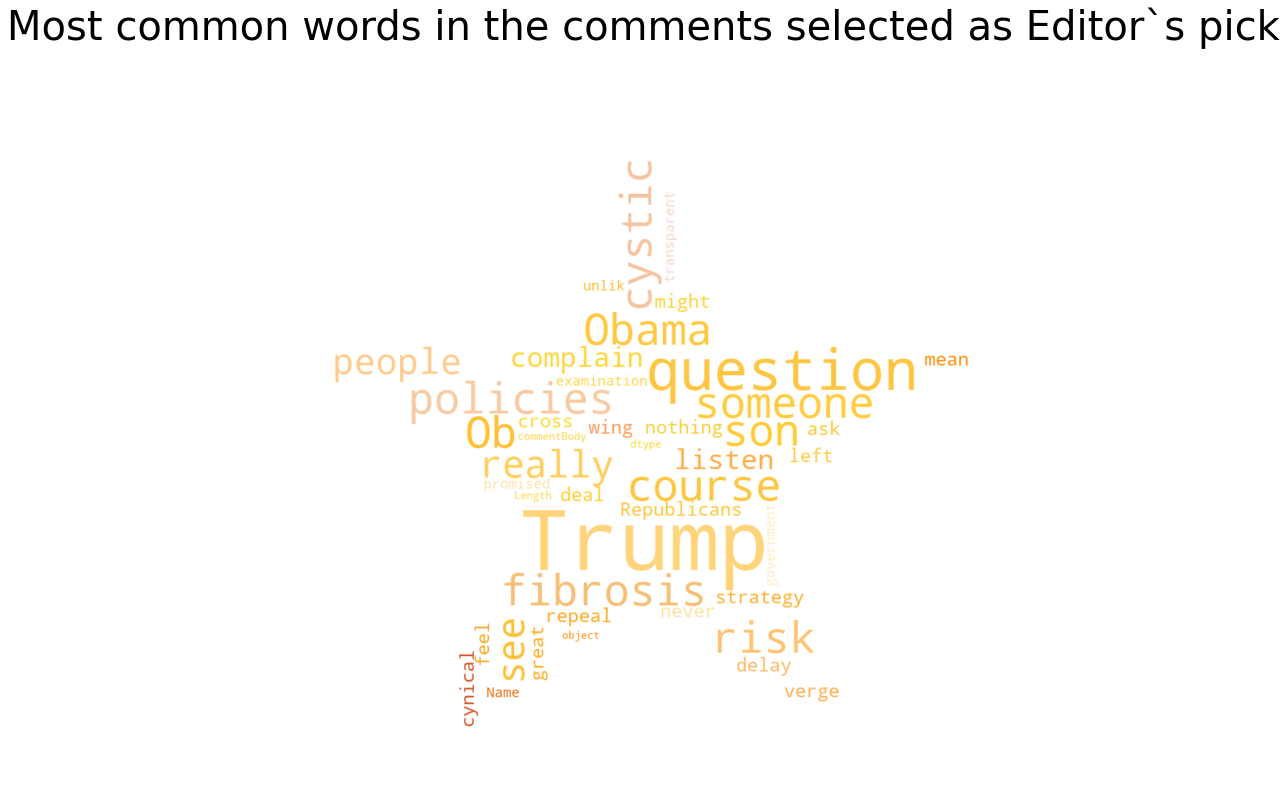

In [18]:
editorsPick_comments_text = str(comments.loc[comments.editorsSelection==1, 'commentBody'])
star_mask = np.array(Image.open(d + 'star.png'))
plot_wordcloud(editorsPick_comments_text, star_mask, max_words=8000, max_font_size=120, figure_size=(16,14),
               title = 'Most common words in the comments selected as Editor`s pick', image_color=True)

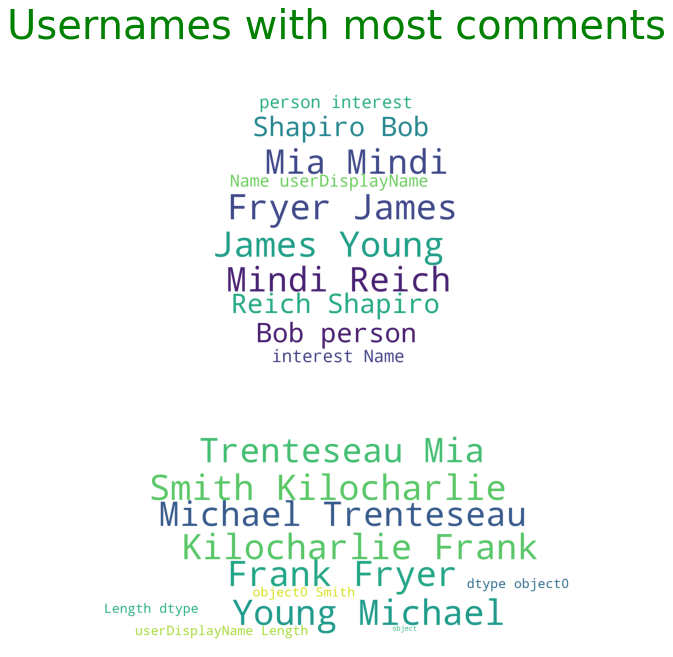

In [19]:
userDisplayNames = str(comments.userDisplayName)*800
user_mask = np.array(Image.open(d + 'user.png'))
plot_wordcloud(userDisplayNames, user_mask, max_words=1200, max_font_size=120, figure_size=(10,12), title = 'Usernames with most comments')

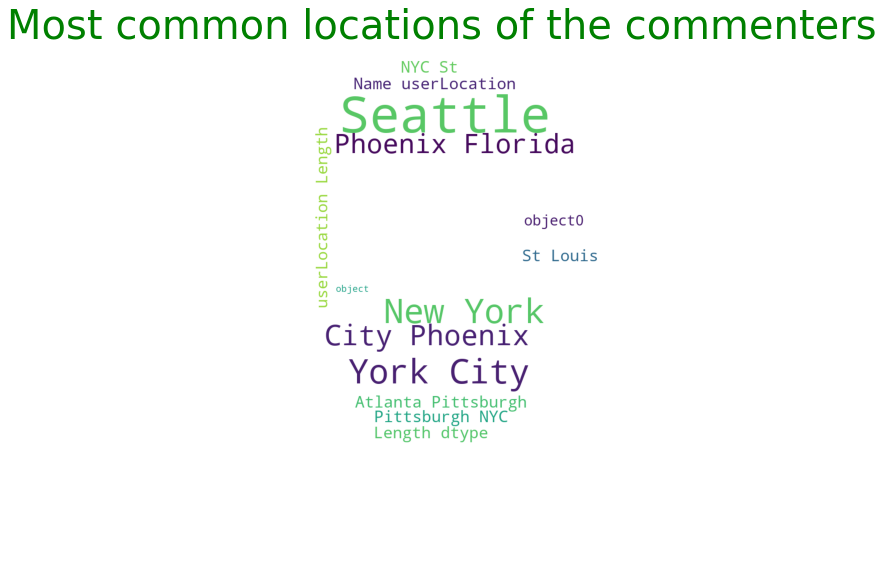

In [20]:
userLocations = str(comments.userLocation)*5
loc_mask = np.array(Image.open(d + 'loc.png'))
plot_wordcloud(userLocations, loc_mask, max_words=800, max_font_size=100, figure_size=(11,16),
               title = 'Most common locations of the commenters')

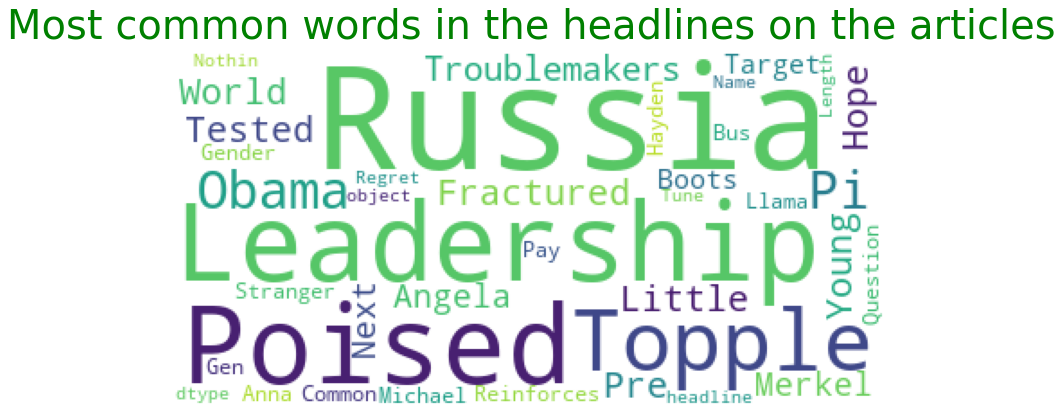

In [21]:
headlines = str(articles.headline)
plot_wordcloud(headlines, max_words=800, max_font_size=80, figure_size=(14,10),
               title = 'Most common words in the headlines on the articles')